In [1]:
#LOAD PACKAGES
import dipspeaks
from dipspeaks import *
import matplotlib.pyplot as plt



Hola caracola

If you need help, contact graciela.sanjurjo@ua.es.



Creating syntetic data
- done!
Rebin light curve and syntetic lightcurve to the desired sn
Done!
Calculate bases for dip/peak detection
- done!
- detecting dips and peaks within light curve and syntetic lightcurve
- done!


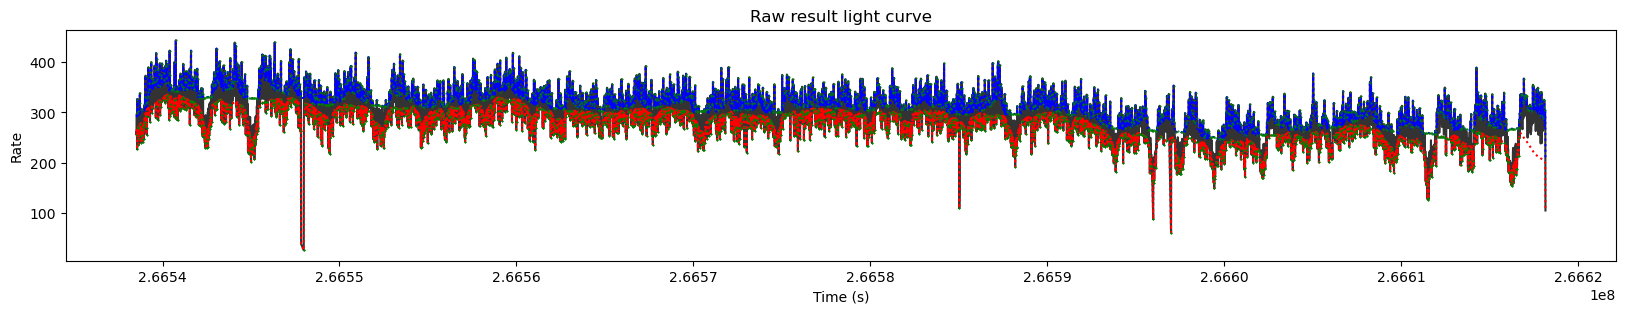

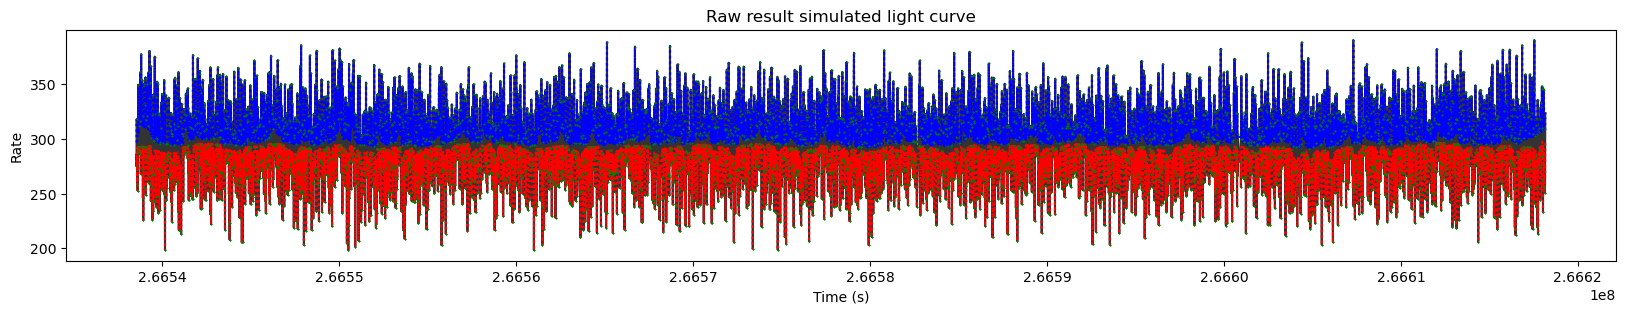

Train auto-encoders in syntetic data
DIPS----------------------------------------------------------------------------------------


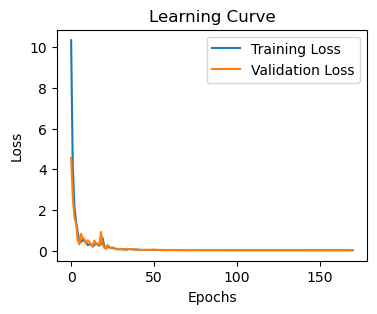

81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 702us/step
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 416us/step


<Figure size 640x480 with 0 Axes>

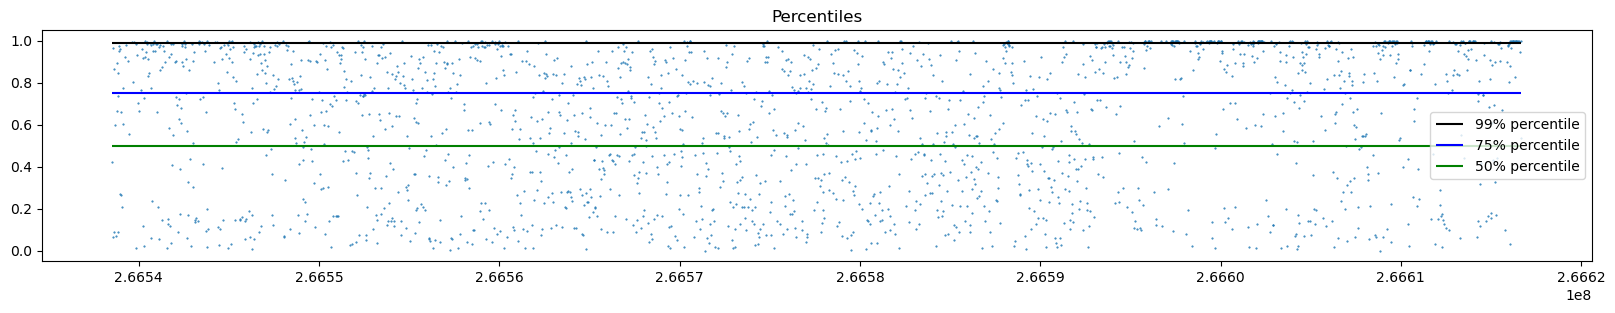

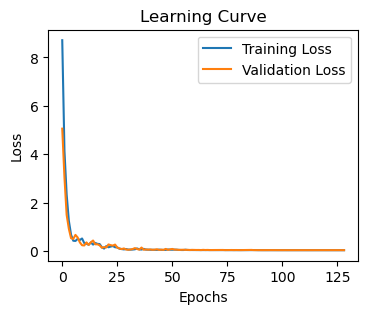

81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 707us/step
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step
PEAKS---------------------------------------------------------------------------------------


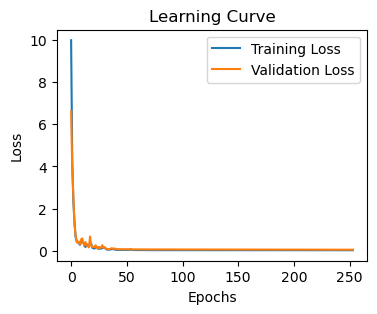

80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 782us/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step


<Figure size 640x480 with 0 Axes>

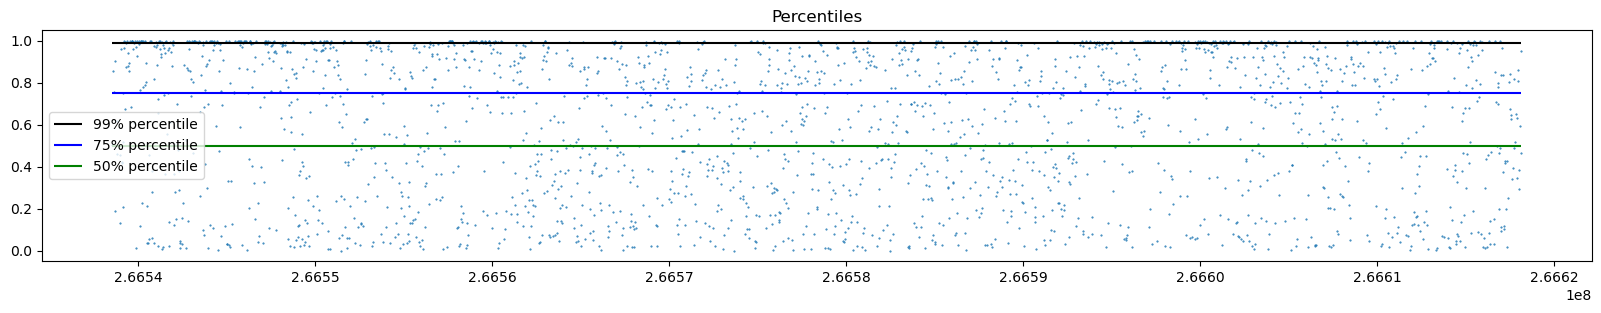

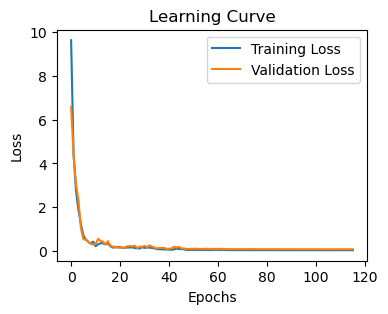

80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 772us/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step
Simulation:
Peaks per second: 0.0003 percentage of rejected peaks: 0.9897
Dips per second: 0.0003 percentage of rejected dips: 0.9899
Result:
Peaks per second: 0.0032 percentage of rejected peaks: 0.8847 probability of detected peaks: 1.0
Dips per second: 0.0026 percentage of rejected dips: 0.898 probability of detected dips: 0.9


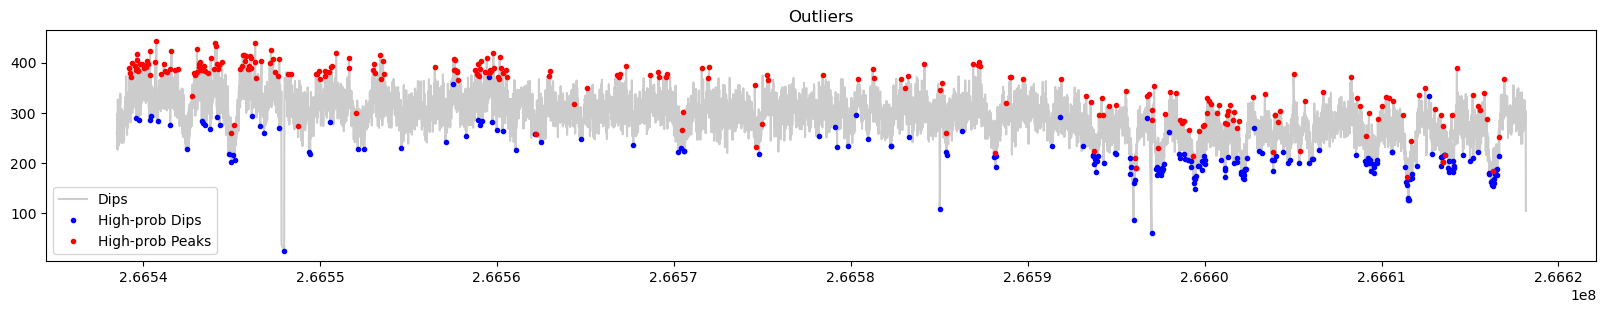

Creating syntetic data
- done!
Rebin light curve and syntetic lightcurve to the desired sn
Done!
Calculate bases for dip/peak detection
- done!
- detecting dips and peaks within light curve and syntetic lightcurve
- done!


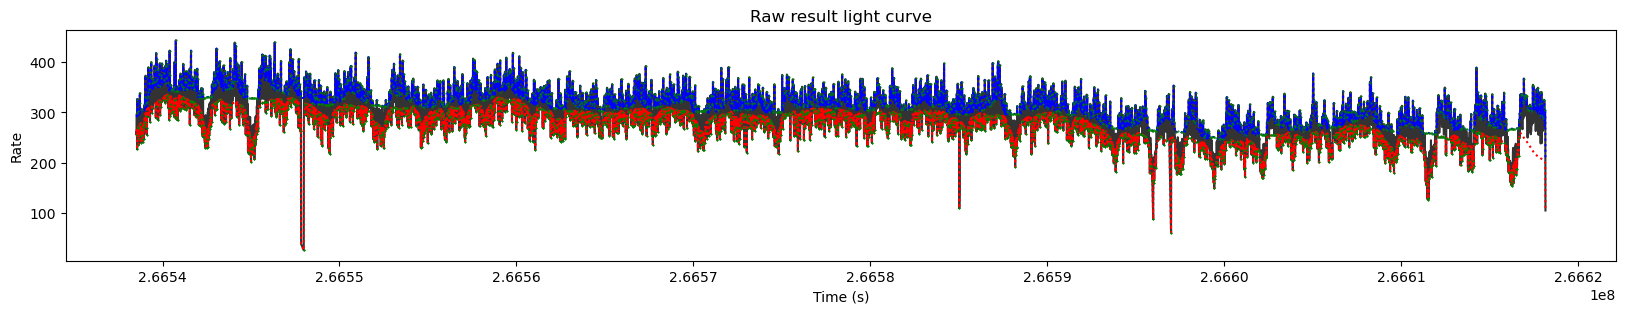

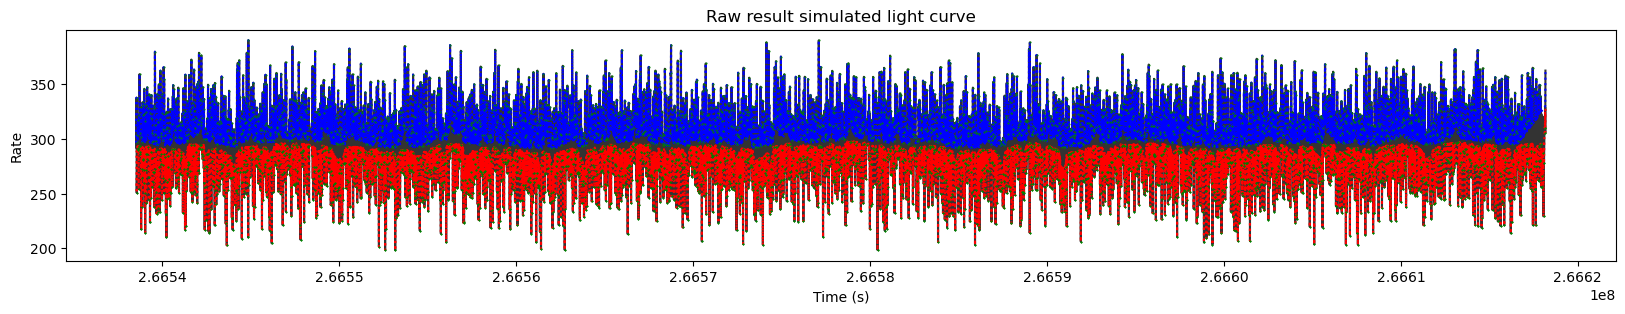

Train auto-encoders in syntetic data
DIPS----------------------------------------------------------------------------------------


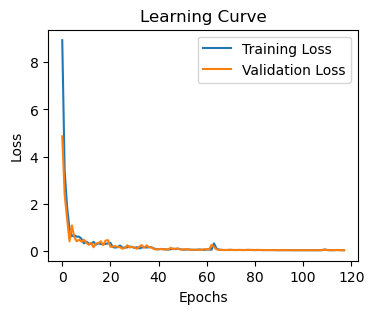

81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 710us/step
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 387us/step


<Figure size 640x480 with 0 Axes>

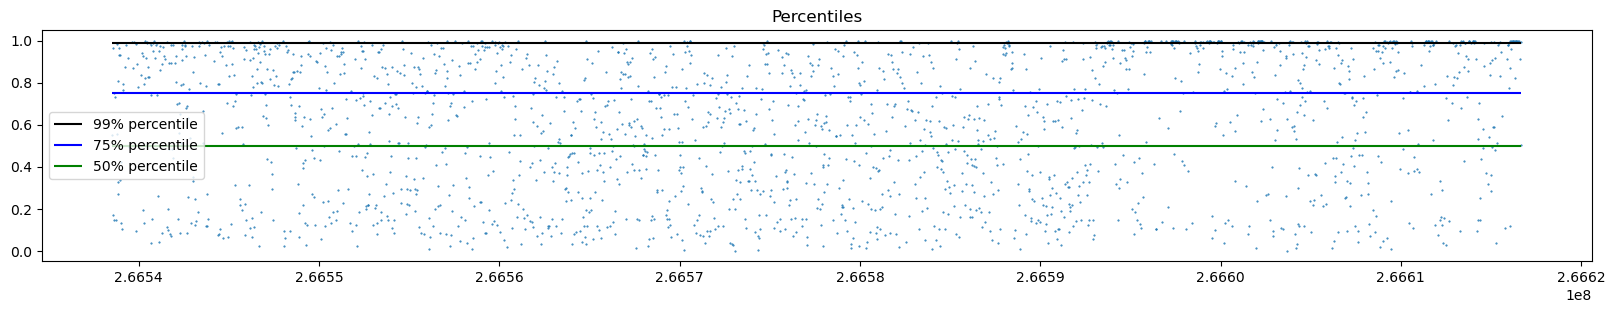

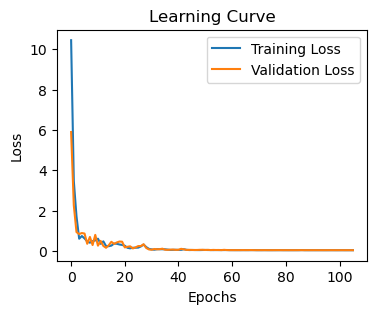

81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 764us/step
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step
PEAKS---------------------------------------------------------------------------------------


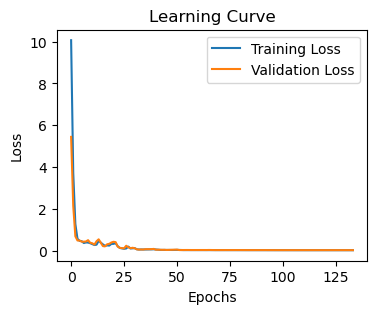

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 654us/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step


<Figure size 640x480 with 0 Axes>

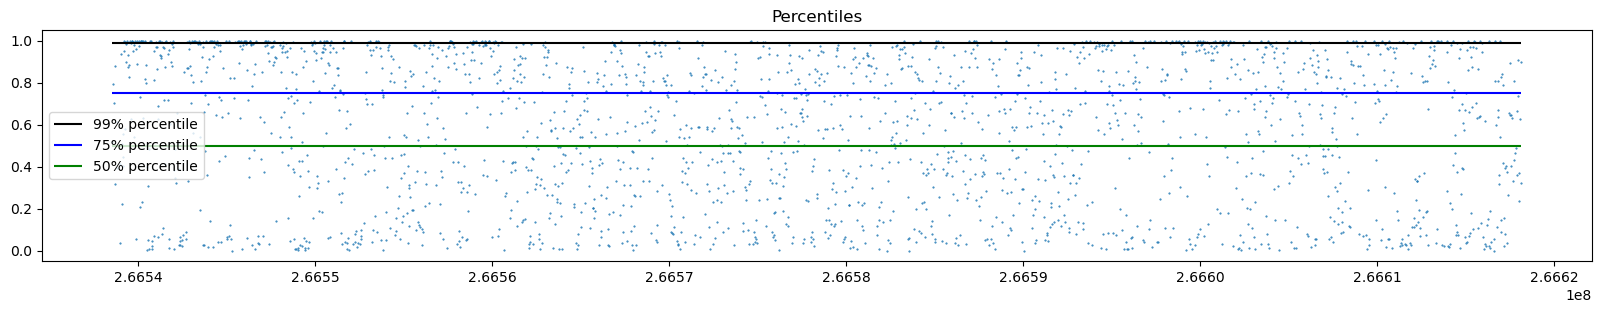

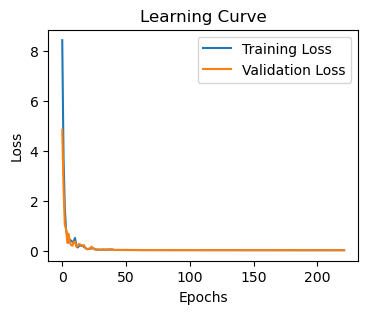

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 652us/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step
Simulation:
Peaks per second: 0.0003 percentage of rejected peaks: 0.9896
Dips per second: 0.0003 percentage of rejected dips: 0.9899
Result:
Peaks per second: 0.0026 percentage of rejected peaks: 0.9077 probability of detected peaks: 1.0
Dips per second: 0.0024 percentage of rejected dips: 0.9058 probability of detected dips: 0.89


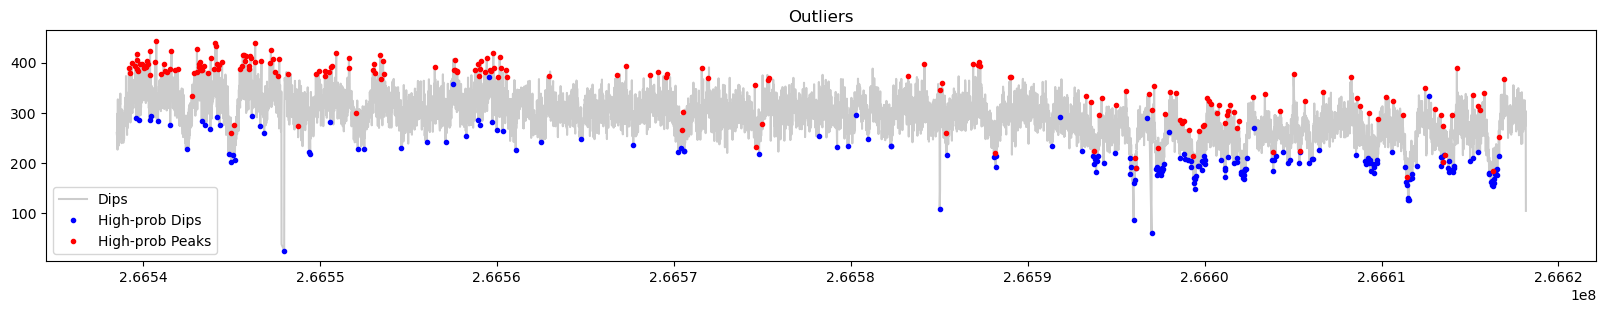

In [2]:
high_lc="./high"
low_lc="./low"

high_peaks_to_clean, high_dips_to_clean, high_lcreb, high_speaks_to_clean, high_sdips_to_clean = detect_dips_and_peaks(high_lc, snr=0.1 ,index_time=0, index_rate=1, index_error_rate=2, num_simulations=1, show_plot = True)
low_peaks_to_clean, low_dips_to_clean, low_lcreb, low_speaks_to_clean, low_sdips_to_clean = detect_dips_and_peaks(high_lc, snr=0.1 ,index_time=0, index_rate=1, index_error_rate=2, num_simulations=1, show_plot = True)

## The result we obtain from our script is the _raw list of peaks and dips and the rebined lightcurve. To perform the analysis we should filter our peaks and dips


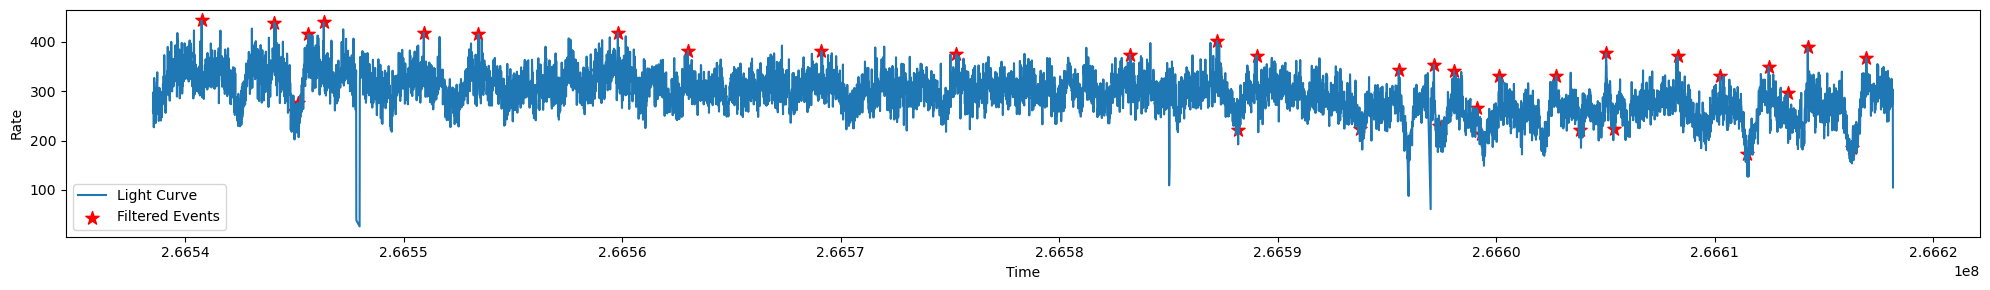

The probability of this filtered dataset being real is 0.0000


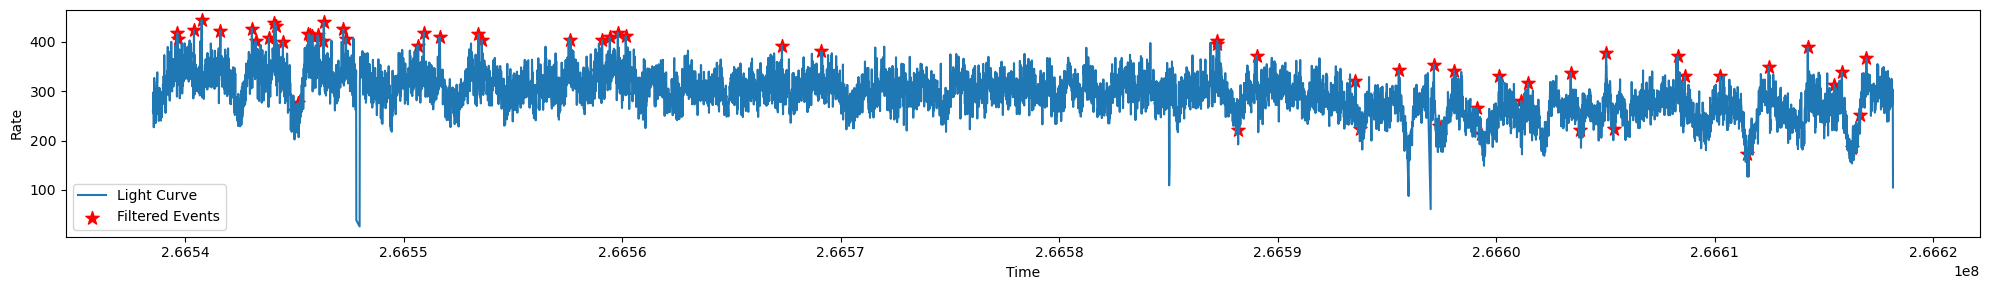

The probability of this filtered dataset being real is 0.0000


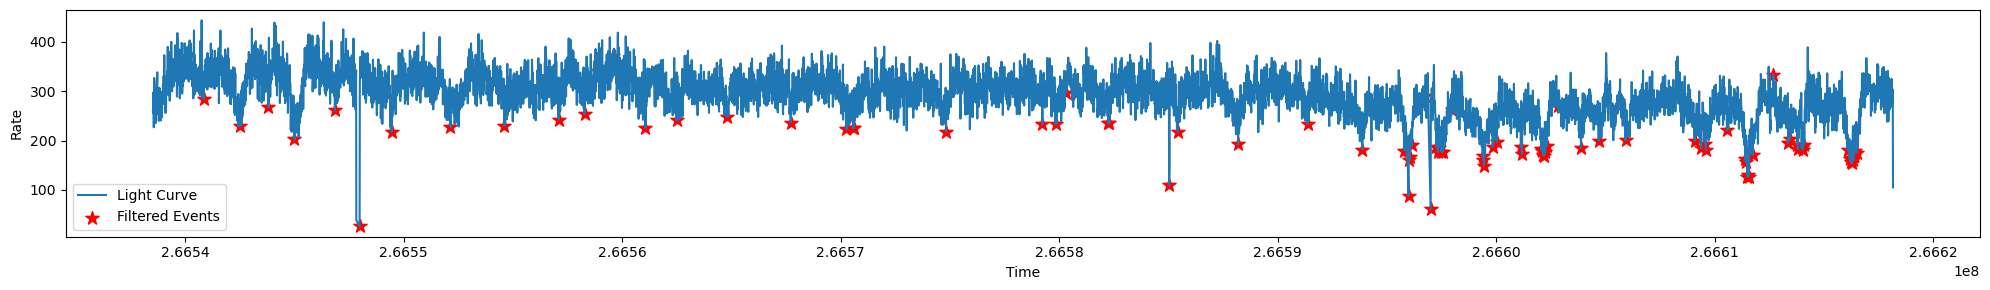

The probability of this filtered dataset being real is 0.0000


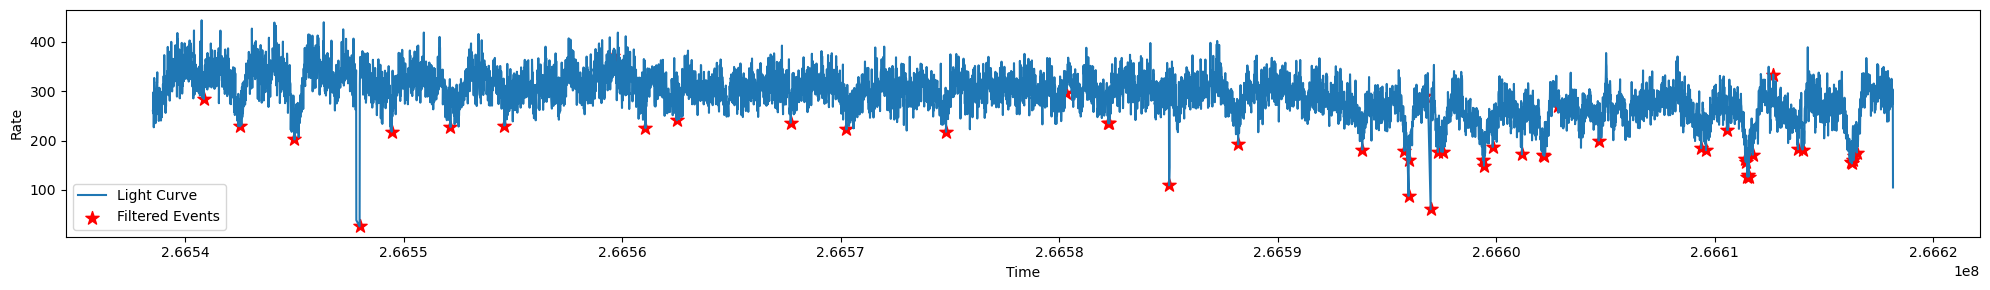

The probability of this filtered dataset being real is 0.0000


In [3]:
high_peaks = filter_dip_peak(high_peaks_to_clean,
                       high_speaks_to_clean,
                       high_lcreb,
                       error_percentile_threshold=0.999,
                       zscore_threshold=4,
                       show_plot=True)

low_peaks = filter_dip_peak(low_peaks_to_clean,
                       low_speaks_to_clean,
                       low_lcreb,
                       error_percentile_threshold=0.999,
                       zscore_threshold=4,
                       show_plot=True)

high_dips = filter_dip_peak(high_dips_to_clean,
                       high_sdips_to_clean,
                       high_lcreb,
                       error_percentile_threshold=0.999,
                       zscore_threshold=4,
                       show_plot=True)

low_dips = filter_dip_peak(low_dips_to_clean,
                       low_sdips_to_clean,
                       low_lcreb,
                       error_percentile_threshold=0.999,
                       zscore_threshold=4,
                       show_plot=True)

## PEAK ANALYSIS
In first place we will:
- Visualize the data
- Check overlaps between peaks detected in the high and in the low energy light curves

Text(0, 0.5, 'Prominence')

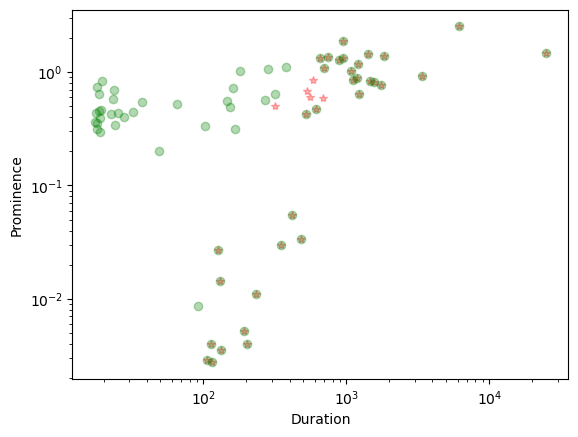

In [4]:
plt.plot(high_peaks.duration, high_peaks.relprominence,"r*",alpha=0.3)
plt.plot(low_peaks.duration, low_peaks.relprominence,"go",alpha=0.3)
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Duration")
plt.ylabel("Prominence")

The function overlap provides the duration of the overlap, the indexes for both datasets and the overlap percentaje of the two features (dips and peaks) that overlap.
We can filter those which overlap at least by certain percentaje of their durations.

In [5]:
overlap_threshold=0.7

overlap ,high_peak_idx_, low_peak_idx_, percentaje_high, percentaje_low = overlap(high_peaks.ti, high_peaks.te, low_peaks.ti, low_peaks.te)

high_peak_idx = high_peak_idx[percentaje_high>overlap_threshold]
low_peak_idx = low_peak_idx[percentaje_low>overlap_threshold]

NameError: name 'high_peak_idx' is not defined

In [ ]:
plt.plot(high_peaks.duration[high_peak_idx], high_peaks.relprominence[high_peak_idx],"r*",alpha=0.3)
plt.plot(low_peaks.duration[low_peak_idx], low_peaks.relprominence[low_peak_idx],"go",alpha=0.3)
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Duration")
plt.ylabel("Prominence")